In [0]:
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import pandas as pd
import pylab as pl
import numpy as np
import time
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
iris = load_iris()
iris_X, iris_y = iris.data[:-1,:], iris.target[:-1]
iris_y = pd.get_dummies(iris_y).values
trainX, testX, trainY, testY = train_test_split(iris_X, iris_y, test_size = 0.33, random_state=42)

In [0]:
numFeatures = trainX.shape[1]

numLabels = trainY.shape[1]

X = tf.placeholder(tf.float32, [None, numFeatures])
yGold = tf.placeholder(tf.float32, [None, numLabels])

In [0]:
W = tf.Variable(tf.zeros([4,3]))
b = tf.Variable(tf.zeros([3]))

In [0]:
weights = tf.Variable(tf.random_normal([numFeatures, numLabels],
                                       mean = 0,
                                       stddev=0.01,
                                       name="weights"))

bias = tf.Variable(tf.random_normal([1, numLabels],
                                       mean = 0,
                                       stddev=0.01,
                                       name="bias"))

In [0]:
apply_weights_OP = tf.matmul(X, weights, name="apply_weights")
add_bias_OP = tf.add(apply_weights_OP, bias, name="add_bias")
activation_OP = tf.nn.sigmoid(add_bias_OP, name="activation")

In [0]:
numEpochs = 700

learningRate = tf.train.exponential_decay(learning_rate=0.0008,
                                          global_step=1,
                                          decay_steps=trainX.shape[0],
                                          decay_rate = 0.95,
                                          staircase=True)

In [0]:
cost_OP = tf.nn.l2_loss(activation_OP - yGold, name ="squared_error_cost")
training_OP = tf.train.GradientDescentOptimizer(learningRate).minimize(cost_OP)

In [0]:
sess = tf.Session()

init_OP = tf.global_variables_initializer()

sess.run(init_OP)

In [0]:
correct_predictions_OP = tf.equal(tf.argmax(activation_OP, 1), tf.argmax(yGold, 1))

accuracy_OP = tf.reduce_mean(tf.cast(correct_predictions_OP, "float"))

activation_summary_OP = tf.summary.histogram("output", activation_OP)

accuracy_summary_OP = tf.summary.scalar("accuracy", accuracy_OP)

cost_summary_OP = tf.summary.scalar("Cost", cost_OP)

weightSummary = tf.summary.histogram("weights", weights.eval(session=sess))
biasSummary = tf.summary.histogram("biass", weights.eval(session=sess))

merged = tf.summary.merge([activation_summary_OP, accuracy_summary_OP, cost_summary_OP, weightSummary, biasSummary])

writer = tf.summary.FileWriter("summary_logs", sess.graph)

In [41]:
cost = 0
diff = 1
epoch_values =[]
accuracy_values = []
cost_values = []

for i in range(numEpochs):
    if i > 1 and diff < .0001:
       print("charge in cost %g; convergence."%diff)
       break
    else:
        step = sess.run(training_OP, feed_dict={X: trainX, yGold: trainY})
        if i % 10 == 0:
            epoch_values.append(i)
            train_accuracy, newCost = sess.run([accuracy_OP, cost_OP], feed_dict={X: trainX, yGold: trainY})
            accuracy_values.append(train_accuracy)
            cost_values.append(newCost)
            diff = abs(newCost - cost)
            cost = newCost

            print("step %d, training accuracy %g, cost %g, change in cost %g"%(i, train_accuracy, newCost, diff))

print("final accuracy on test set: %s" %str(sess.run(accuracy_OP, feed_dict={X: testX, yGold: testY})))

step 0, training accuracy 0.333333, cost 34.9947, change in cost 34.9947
step 10, training accuracy 0.555556, cost 30.1166, change in cost 4.8781
step 20, training accuracy 0.646465, cost 28.1659, change in cost 1.95075
step 30, training accuracy 0.646465, cost 26.519, change in cost 1.64692
step 40, training accuracy 0.646465, cost 25.1501, change in cost 1.36889
step 50, training accuracy 0.646465, cost 24.0191, change in cost 1.131
step 60, training accuracy 0.646465, cost 23.083, change in cost 0.93609
step 70, training accuracy 0.646465, cost 22.3033, change in cost 0.779696
step 80, training accuracy 0.646465, cost 21.6481, change in cost 0.655153
step 90, training accuracy 0.646465, cost 21.0922, change in cost 0.555956
step 100, training accuracy 0.666667, cost 20.6156, change in cost 0.476562
step 110, training accuracy 0.666667, cost 20.2031, change in cost 0.412577
step 120, training accuracy 0.666667, cost 19.8425, change in cost 0.360579
step 130, training accuracy 0.66666

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


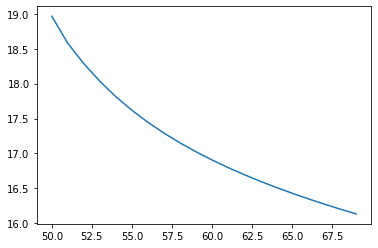

In [42]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.plot([np.mean(cost_values[i-50:i]) for i in range(len(cost_values))])
plt.show()